In [1]:
import numpy as np
from scipy.stats import shapiro
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

# FUNÇÕES AUXILIARES

In [2]:

def teste_normalidade(data1, data2, data3, data4, data5, data6, metrica=None):
    all_data = [np.asarray(data1), np.asarray(data2), np.asarray(data3), np.asarray(data4), np.asarray(data5), np.asarray(data6)]
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    
    for i, ax in enumerate(axes.flatten()):
        if i < len(all_data):
            data = all_data[i]
            statistic, p_value = shapiro(data)
            sm.qqplot(data, line='s', ax=ax)
            
            title = i
            if title == 0:
                ax.set_title(f'MLP Tempo\np-valor: {p_value:.4f}')
            elif title == 1:
                ax.set_title(f'MLP Freq\np-valor: {p_value:.4f}')
            elif title == 2:
                ax.set_title(f'CNN1D Tempo\np-valor: {p_value:.4f}')
            elif title == 3:
                ax.set_title(f'CNN1D Freq\np-valor: {p_value:.4f}')
            elif title == 4:
                ax.set_title(f'CNN2D Tempo\np-valor: {p_value:.4f}')
            elif title == 5:
                ax.set_title(f'CNN2D Freq\np-valor: {p_value:.4f}')
        else:
            ax.axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.suptitle(f"Teste de Shapiro-Wilk para Normalidade - {metrica}", fontsize=16)  
    plt.show()
    
def kruskal_wallis(mlp_tempo,mlp_freq,cnn1d_tempo,cnn1d_freq,cnn2d_tempo,cnn2d_freq,metrica=None):

    # Realizar o teste de Kruskal-Wallis
    statistic, p_value = kruskal(mlp_tempo,mlp_freq,cnn1d_tempo,cnn1d_freq,cnn2d_tempo,cnn2d_freq)

    # Plotar gráfico de caixa para visualizar as amostras
    plt.figure(figsize=(16, 8))
    plt.boxplot([mcc_mlp_tempo,mcc_mlp_freq,mcc_cnn1d_tempo,mcc_cnn1d_freq,mcc_cnn2d_tempo,mcc_cnn2d_freq], labels=['MLP Tempo', 'MLP Freq', 'CNN1D Tempo', 'CNN1D Freq', 'CNN2D Tempo', 'CNN2D Freq'])
    plt.title(f"Teste de Kruskal-Wallis - {metrica}\np-valor: {p_value:.4f}")
    plt.ylabel("Value")
    plt.ylim(0.0, 1.0)
    plt.show()
    
def kruskal_wallis2(mlp,cnn1d,cnn2d,metrica=None):

    # Realizar o teste de Kruskal-Wallis
    statistic, p_value = kruskal(mlp,cnn1d,cnn2d)

    # Plotar gráfico de caixa para visualizar as amostras
    plt.figure(figsize=(16, 8))
    plt.boxplot([mlp,cnn1d,cnn2d], labels=['MLP', 'CNN1D', 'CNN2D Tempo'])
    plt.title(f"Teste de Kruskal-Wallis - {metrica}\np-valor: {p_value:.4f}")
    plt.ylabel("Value")
    plt.ylim(0.0, 1.0)
    plt.show()

def grafico_barras_com_erro(medias,desvios_padrao,metrica = None):
    
    groups = ['MLP Tempo', 'MLP Freq', 'CNN 1D Tempo','CNN 1D Freq','CNN 2D Tempo','CNN 2D Freq']
    means = medias
    std_devs = desvios_padrao
    
    plt.figure(figsize=(16, 8))
    plt.bar(groups, means, yerr=std_devs, capsize=5)
    plt.xlabel('Grupos')
    plt.ylabel('Médias')
    plt.title(f'Gráfico de Barras com Desvio Padrão - {metrica}')
    plt.show()
    
def grafico_barras_com_erro2(medias,desvios_padrao,metrica = None):
    
    groups = ['MLP','CNN 1D', 'CNN 2D Tempo',]
    means = medias
    std_devs = desvios_padrao
    
    plt.figure(figsize=(16, 8))
    plt.bar(groups, means, yerr=std_devs, capsize=5)
    plt.xlabel('Grupos')
    plt.ylabel('Médias')
    plt.title(f'Gráfico de Barras com Desvio Padrão - {metrica}')
    plt.show()

def grafico_dispersao(dados,rede=None, metrica=None):
    x = np.arange(1,len(dados)+1)
    y = np.array(dados)

    plt.scatter(x, y)
    plt.xlabel('Treinamentos')
    plt.xticks(np.arange(min(x), max(x)+1, 1))
    if metrica == 'MCC':
        plt.ylabel('MCC')
    else:
        plt.ylabel('AUC')
    plt.title(f'Gráfico de Dispersão para Visualizar a Variabilidade {rede}')
    plt.show()
    
    
def mann_whitney_u(rede1,rede2,tipo=None):

    # Dados de exemplo para duas amostras independentes
    sample1 = np.array(rede1)
    sample2 = np.array(rede2)

    # Realizar o teste Mann-Whitney U
    statistic, p_value = mannwhitneyu(sample1, sample2)

    # Plotar gráfico de caixa para visualizar as amostras
    plt.boxplot([sample1, sample2], labels=[f"{tipo} tempo", f"{tipo} freq"])
    plt.title(f"Teste de Mann-Whitney U\np-valor: {p_value:.4f}")
    plt.ylabel("Média")
    plt.show()
    
def mann_whitney_u2(rede1,rede2,tipo1=None,tipo2= None):

    # Dados de exemplo para duas amostras independentes
    sample1 = np.array(rede1)
    sample2 = np.array(rede2)

    # Realizar o teste Mann-Whitney U
    statistic, p_value = mannwhitneyu(sample1, sample2)

    # Plotar gráfico de caixa para visualizar as amostras
    plt.boxplot([sample1, sample2], labels=[f"{tipo1}", f"{tipo2}"])
    plt.title(f"Teste de Mann-Whitney U\np-valor: {p_value:.4f}")
    plt.ylabel("Média")
    plt.show()

    


# MLP

In [3]:


mcc_mlp_tempo = [0.8481,0.9013,0.9234,0.8502,0.8956,0.8866,0.7465,0.8865,0.8792,0.9090,0.7950,0.8505,0.8732,0.8864,0.8484,0.9027,0.8749,0.9215,0.8798,0.8191]
auc_mlp_tempo = [0.94,0.92,0.96,0.88,0.93,0.92,0.79,0.92,0.90,0.94,0.90,0.89,0.94,0.94,0.89,0.94,0.93,0.95,0.93,0.86]

media_mlp_tempo_mcc = np.mean(mcc_mlp_tempo)
desviop_mlp_tempo_mcc =  np.std(mcc_mlp_tempo)
media_mlp_tempo_auc = np.mean(auc_mlp_tempo)
desviop_mlp_tempo_auc =  np.std(auc_mlp_tempo)

maior_valor_mcc = np.argmax(mcc_mlp_tempo)
maior_valor_auc = np.argmax(auc_mlp_tempo)
pior_valor_mcc = np.argmin(mcc_mlp_tempo)
pior_valor_auc = np.argmin(auc_mlp_tempo)

print(maior_valor_mcc)
print(maior_valor_auc)
print(pior_valor_mcc)
print(pior_valor_mcc)
print()

print(f'media_mlp_tempo_mcc:{media_mlp_tempo_mcc}')
print(f'desviop_mlp_tempo_mcc:{desviop_mlp_tempo_mcc}')
print() 
print(f'media_mlp_tempo_auc:{media_mlp_tempo_auc}')
print(f'desviop_mlp_tempo_auc:{desviop_mlp_tempo_auc}')


2
2
6
6

media_mlp_tempo_mcc:0.868895
desviop_mlp_tempo_mcc:0.04238098010900643

media_mlp_tempo_auc:0.9135
desviop_mlp_tempo_auc:0.03785168424258026


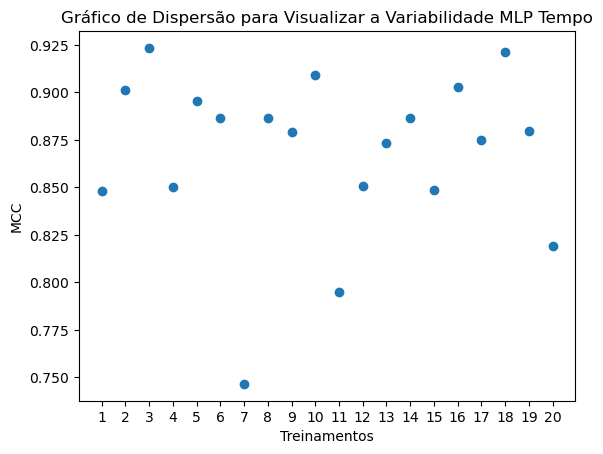

In [4]:
grafico_dispersao(mcc_mlp_tempo,"MLP Tempo","MCC")

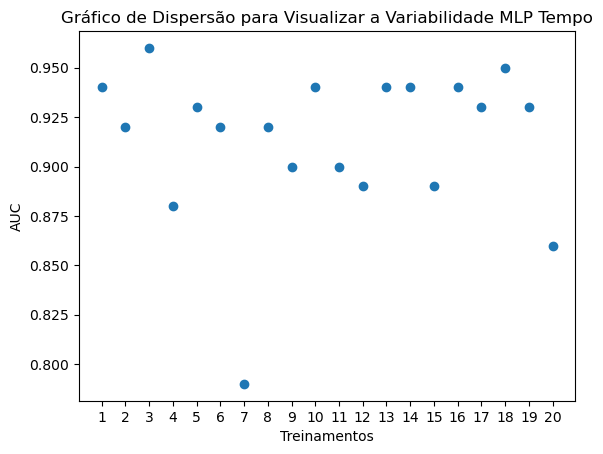

In [5]:
grafico_dispersao(auc_mlp_tempo,"MLP Tempo","AUC")

In [6]:

mcc_mlp_freq = [0.9498,0.9217,0.9321,0.9036,0.8804,0.9503,0.8826,0.9010,0.7527,0.8746,0.9313,0.9191,0.9137,0.8648,0.8778,0.9454,0.9143,0.8825,0.8455,0.8804]
auc_mlp_freq = [0.96,0.93,0.94,0.92,0.90,0.97,0.89,0.91,0.79,0.89,0.96,0.93,0.92,0.88,0.89,0.97,0.93,0.90,0.86,0.90]

media_mlp_freq_mcc = np.mean(mcc_mlp_freq)
desviop_mlp_freq_mcc =  np.std(mcc_mlp_freq)
media_mlp_freq_auc = np.mean(auc_mlp_freq)
desviop_mlp_freq_auc =  np.std(auc_mlp_freq)

maior_valor_mcc = np.argmax(mcc_mlp_freq)
maior_valor_auc = np.argmax(auc_mlp_freq)
pior_valor_mcc = np.argmin(mcc_mlp_freq)
pior_valor_auc = np.argmin(auc_mlp_freq)

print(maior_valor_mcc)
print(maior_valor_auc)
print(pior_valor_mcc)
print(pior_valor_mcc)
print()


print(f'media_mlp_freq_mcc:{media_mlp_freq_mcc}')
print(f'desviop_mlp_freq_mcc:{desviop_mlp_freq_mcc}')
print() 
print(f'media_mlp_freq_auc:{media_mlp_freq_auc}')
print(f'desviop_mlp_freq_auc:{desviop_mlp_freq_auc}')


5
5
8
8

media_mlp_freq_mcc:0.8961800000000002
desviop_mlp_freq_mcc:0.043848199506935276

media_mlp_freq_auc:0.9119999999999999
desviop_mlp_freq_auc:0.041060930335295606


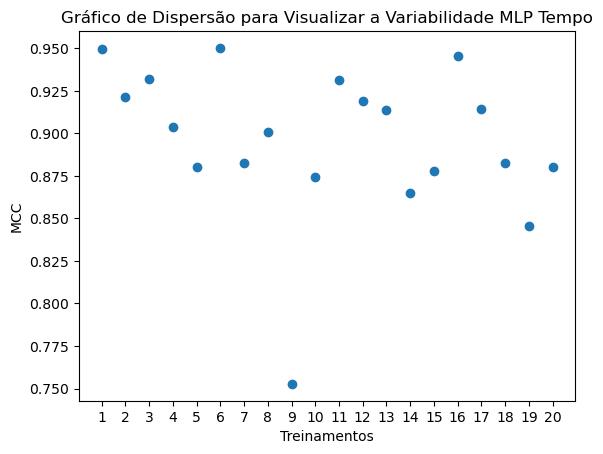

In [7]:
grafico_dispersao(mcc_mlp_freq,"MLP Tempo","MCC")

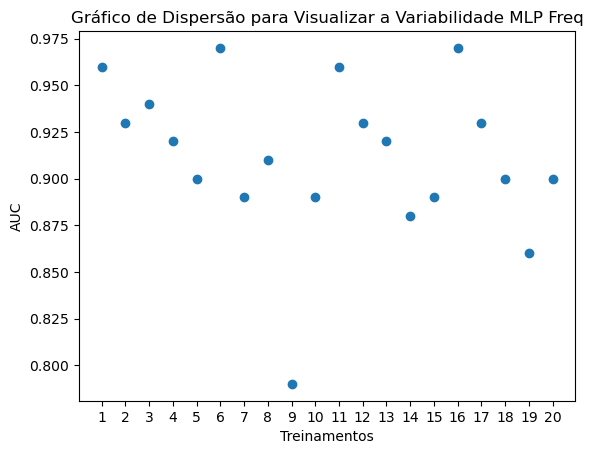

In [8]:
grafico_dispersao(auc_mlp_freq,"MLP Freq","AUC")

# CNN 1D


In [9]:
mcc_cnn1d_tempo = [0.9736,0.9442,0.9710,0.9624,0.9349,0.9637,0.9692,0.9546,0.9839,0.9560,0.9496,0.9764,0.9788,0.9365,0.8970,0.9674,0.9510,0.9638,0.9492,0.9475]
auc_cnn1d_tempo = [0.99,0.95,0.99,0.97,0.94,0.98,0.98,0.98,0.98,0.97,0.98,0.99,0.99,0.98,0.98,0.97,0.97,0.97,0.97,0.96]


media_cnn1d_tempo_mcc = np.mean(mcc_cnn1d_tempo)
desviop_cnn1d_tempo_mcc =  np.std(mcc_cnn1d_tempo)
media_cnn1d_tempo_auc = np.mean(auc_cnn1d_tempo)
desviop_cnn1d_tempo_auc =  np.std(auc_cnn1d_tempo)

maior_valor_mcc = np.argmax(mcc_cnn1d_tempo)
maior_valor_auc = np.argmax(auc_cnn1d_tempo)
pior_valor_mcc = np.argmin(mcc_cnn1d_tempo)
pior_valor_auc = np.argmin(auc_cnn1d_tempo)

print(maior_valor_mcc)
print(maior_valor_auc)
print(pior_valor_mcc)
print(pior_valor_mcc)
print()

print(f'media_cnn1d_tempo_mcc:{media_cnn1d_tempo_mcc}')
print(f'desviop_cnn1d_tempo_mcc:{desviop_cnn1d_tempo_mcc}')
print() 
print(f'media_cnn1d_tempo_auc:{media_cnn1d_tempo_auc}')
print(f'desviop_cnn1d_tempo_auc:{desviop_cnn1d_tempo_auc}')


8
0
14
14

media_cnn1d_tempo_mcc:0.956535
desviop_cnn1d_tempo_mcc:0.019158347397414007

media_cnn1d_tempo_auc:0.9744999999999999
desviop_cnn1d_tempo_auc:0.012835497652993445


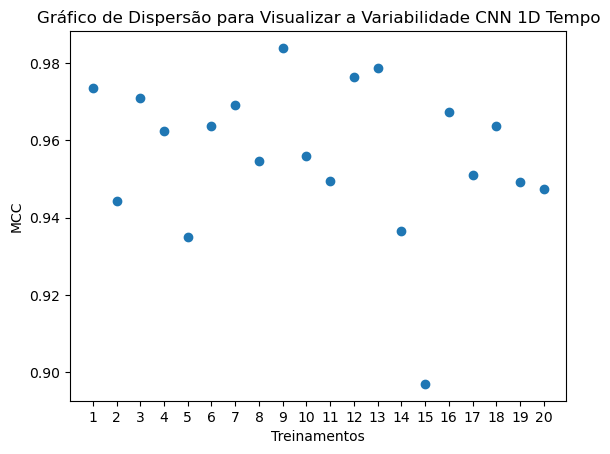

In [10]:
grafico_dispersao(mcc_cnn1d_tempo,"CNN 1D Tempo","MCC")

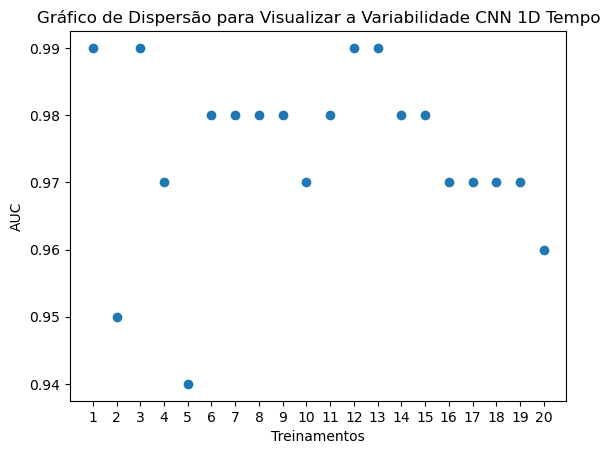

In [11]:
grafico_dispersao(auc_cnn1d_tempo,"CNN 1D Tempo","AUC")

In [12]:
mcc_cnn1d_freq = [0.9594,0.9828,0.9618,0.9520,0.9681,0.9176,0.9720,0.9757,0.9627,0.9701,0.9767,0.9536,0.9690,0.9681,0.9733,0.9354,0.9618,0.9588,0.9168,0.9749]
auc_cnn1d_freq = [0.98,0.99,0.99,0.97,0.98,0.99,0.99,0.98,0.99,0.99,0.99,0.96,0.98,0.97,0.99,0.99,0.99,0.97,0.99,0.98]

media_cnn1d_freq_mcc = np.mean(mcc_cnn1d_freq)
desviop_cnn1d_freq_mcc =  np.std(mcc_cnn1d_freq)
media_cnn1d_freq_auc = np.mean(auc_cnn1d_freq)
desviop_cnn1d_freq_auc =  np.std(auc_cnn1d_freq)

maior_valor_mcc = np.argmax(mcc_cnn1d_freq)
maior_valor_auc = np.argmax(auc_cnn1d_freq)
pior_valor_mcc = np.argmin(mcc_cnn1d_freq)
pior_valor_auc = np.argmin(auc_cnn1d_freq)

print(maior_valor_mcc)
print(maior_valor_auc)
print(pior_valor_mcc)
print(pior_valor_mcc)
print()

print(f'media_cnn1d_freq_mcc:{media_cnn1d_freq_mcc}')
print(f'desviop_cnn1d_freq_mcc:{desviop_cnn1d_freq_mcc}')
print() 
print(f'media_cnn1d_freq_auc:{media_cnn1d_freq_auc}')
print(f'desviop_cnn1d_freq_auc:{desviop_cnn1d_freq_auc}')
print() 



1
1
18
18

media_cnn1d_freq_mcc:0.96053
desviop_cnn1d_freq_mcc:0.01772910319220914

media_cnn1d_freq_auc:0.9829999999999999
desviop_cnn1d_freq_auc:0.009000000000000008



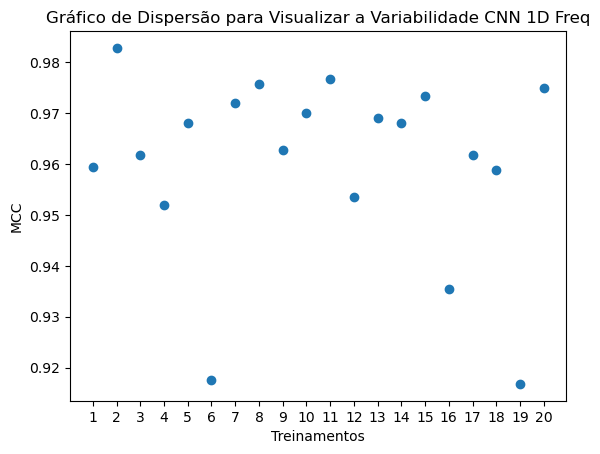

In [13]:
grafico_dispersao(mcc_cnn1d_freq,"CNN 1D Freq","MCC")

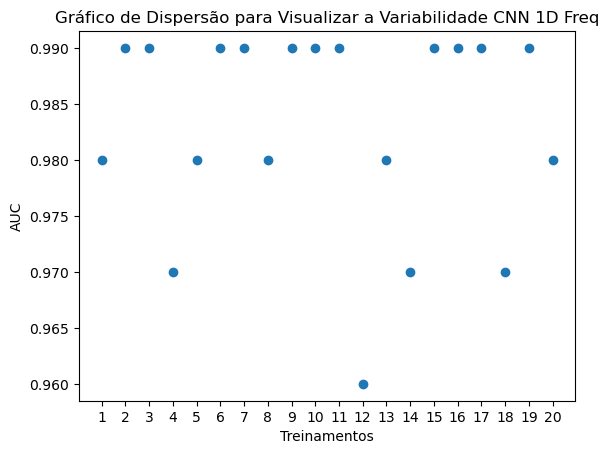

In [14]:
grafico_dispersao(auc_cnn1d_freq,"CNN 1D Freq","AUC")

# CNN 2D

In [15]:
mcc_cnn2d_tempo = [0.9438, 0.000,0.9739,0.9585,0.9329, 0.000,0.9725,0.9550,0.9550,0.9561,0.9612,0.9730,0.9478,0.9814,0.9681,0.9778,0.000,0.000,0.9597,0.9665]
auc_cnn2d_tempo = [0.97,0.50,0.98,0.98,0.99,0.50,0.99,0.99,0.98,0.98,0.98,0.99,0.97,0.99,0.99,0.99,0.50,0.50,0.98,0.9]

media_cnn2d_tempo_mcc = np.mean(mcc_cnn2d_tempo)
desviop_cnn2d_tempo_mcc =  np.std(mcc_cnn2d_tempo)
media_cnn2d_tempo_auc = np.mean(auc_cnn2d_tempo)
desviop_cnn2d_tempo_auc =  np.std(auc_cnn2d_tempo)

maior_valor_mcc = np.argmax(mcc_cnn2d_tempo)
maior_valor_auc = np.argmax(auc_cnn2d_tempo)
pior_valor_mcc = np.argmin(mcc_cnn2d_tempo)
pior_valor_auc = np.argmin(auc_cnn2d_tempo)

print(maior_valor_mcc)
print(maior_valor_auc)
print(pior_valor_mcc)
print(pior_valor_mcc)
print()

print(f'media_cnn2d_tempo_mcc:{media_cnn2d_tempo_mcc}')
print(f'desviop_cnn2d_tempo_mcc:{desviop_cnn2d_tempo_mcc}')
print() 
print(f'media_cnn2d_tempo_auc:{media_cnn2d_tempo_auc}')
print(f'desviop_cnn2d_tempo_auc:{desviop_cnn2d_tempo_auc}')


13
4
1
1

media_cnn2d_tempo_mcc:0.7691600000000001
desviop_cnn2d_tempo_mcc:0.38474781922708795

media_cnn2d_tempo_auc:0.8825
desviop_cnn2d_tempo_auc:0.19219456287834993


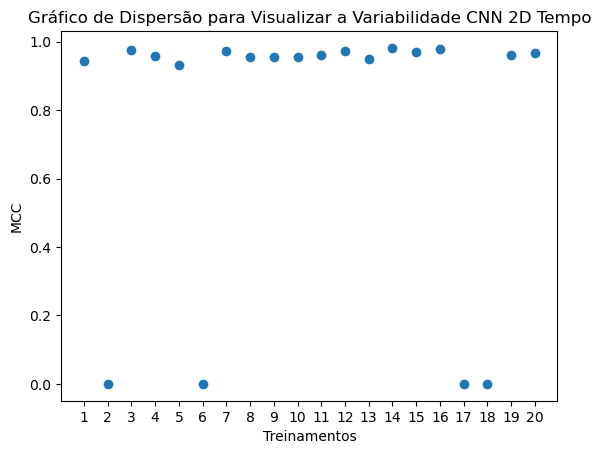

In [16]:
grafico_dispersao(mcc_cnn2d_tempo,"CNN 2D Tempo","MCC")

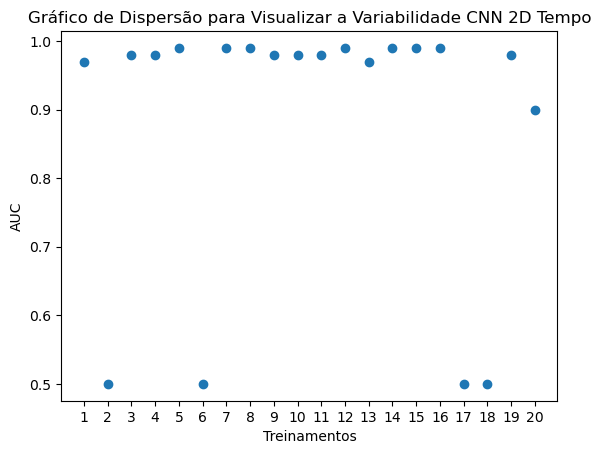

In [17]:
grafico_dispersao(auc_cnn2d_tempo,"CNN 2D Tempo","AUC")

In [18]:
mcc_cnn2d_freq = [0.9656,0.9743,0.9684,0.9446,0.9473,0.9585,0.9498,0.9533,0.9604,0.9457,0.9586,0.9706,0.9650,0.0000,0.9562,0.9531,0.0000,0.9733,0.2900,0.9518]
auc_cnn2d_freq = [0.98,0.99,0.98,0.99,0.98,0.98,0.98,0.98,0.97,0.95,0.99,0.99,0.99,0.50,0.99,0.96,0.50,0.99,0.54,0.96]

media_cnn2d_freq_mcc = np.mean(mcc_cnn2d_freq)
desviop_cnn2d_freq_mcc =  np.std(mcc_cnn2d_freq)
media_cnn2d_freq_auc = np.mean(auc_cnn2d_freq)
desviop_cnn2d_freq_auc =  np.std(auc_cnn2d_freq)

maior_valor_mcc = np.argmax(mcc_cnn2d_freq)
maior_valor_auc = np.argmax(auc_cnn2d_freq)
pior_valor_mcc = np.argmin(mcc_cnn2d_freq)
pior_valor_auc = np.argmin(auc_cnn2d_freq)

print(maior_valor_mcc)
print(maior_valor_auc)
print(pior_valor_mcc)
print(pior_valor_mcc)
print()

print(f'media_cnn2d_freq_mcc:{media_cnn2d_freq_mcc}')
print(f'desviop_cnn2d_freq_mcc:{desviop_cnn2d_freq_mcc}')
print() 
print(f'media_cnn2d_freq_auc:{media_cnn2d_freq_auc}')
print(f'desviop_cnn2d_freq_auc:{desviop_cnn2d_freq_auc}')


1
1
13
13

media_cnn2d_freq_mcc:0.8293250000000001
desviop_cnn2d_freq_mcc:0.3124169551656888

media_cnn2d_freq_auc:0.9094999999999999
desviop_cnn2d_freq_auc:0.166957329878026


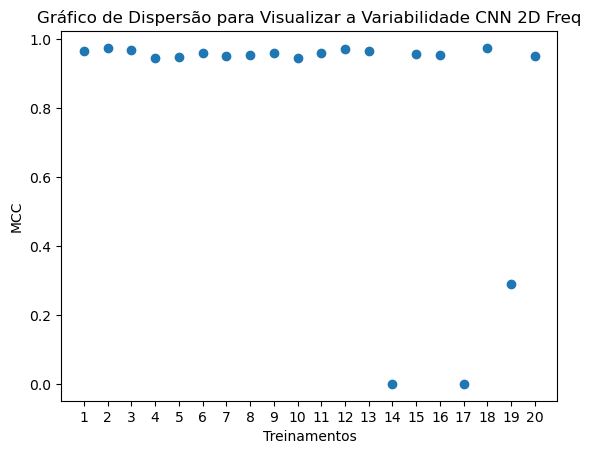

In [19]:
grafico_dispersao(mcc_cnn2d_freq,"CNN 2D Freq","MCC")

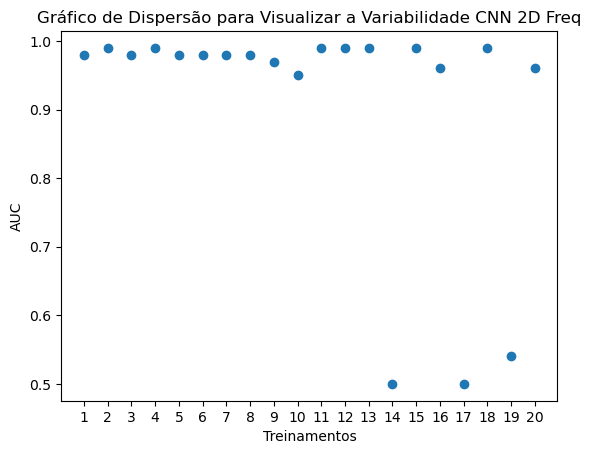

In [20]:
grafico_dispersao(auc_cnn2d_freq,"CNN 2D Freq","AUC")

# Análise Geral

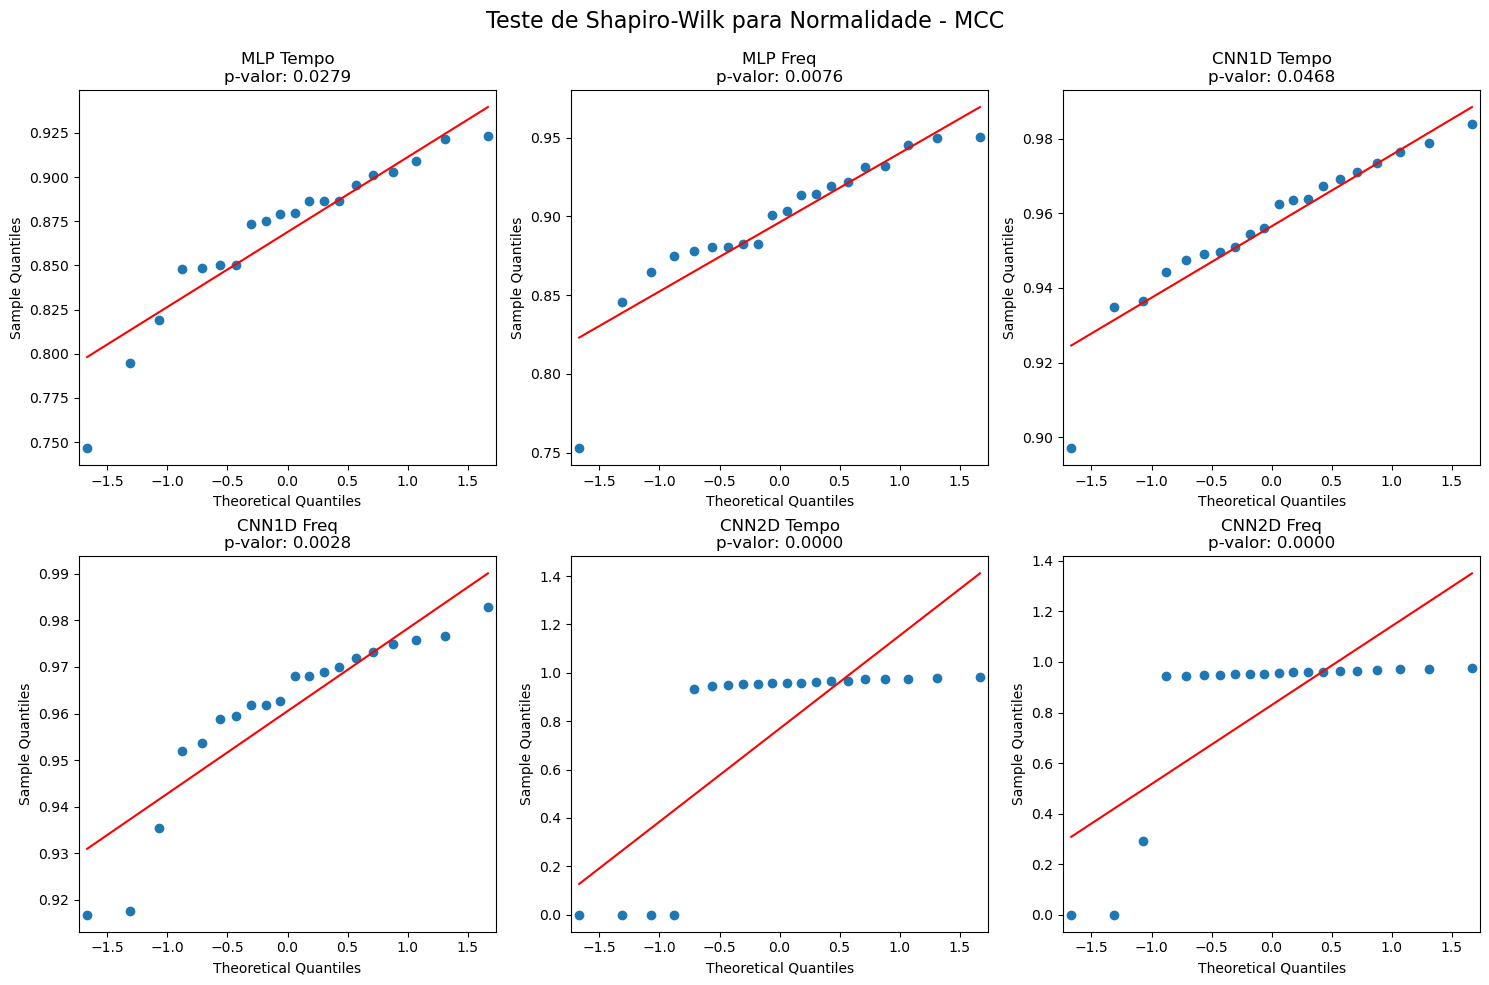

In [21]:
#TESTE DE NORMALIDADE MCC

teste_normalidade(mcc_mlp_tempo,mcc_mlp_freq,mcc_cnn1d_tempo,mcc_cnn1d_freq,mcc_cnn2d_tempo,mcc_cnn2d_freq, "MCC")

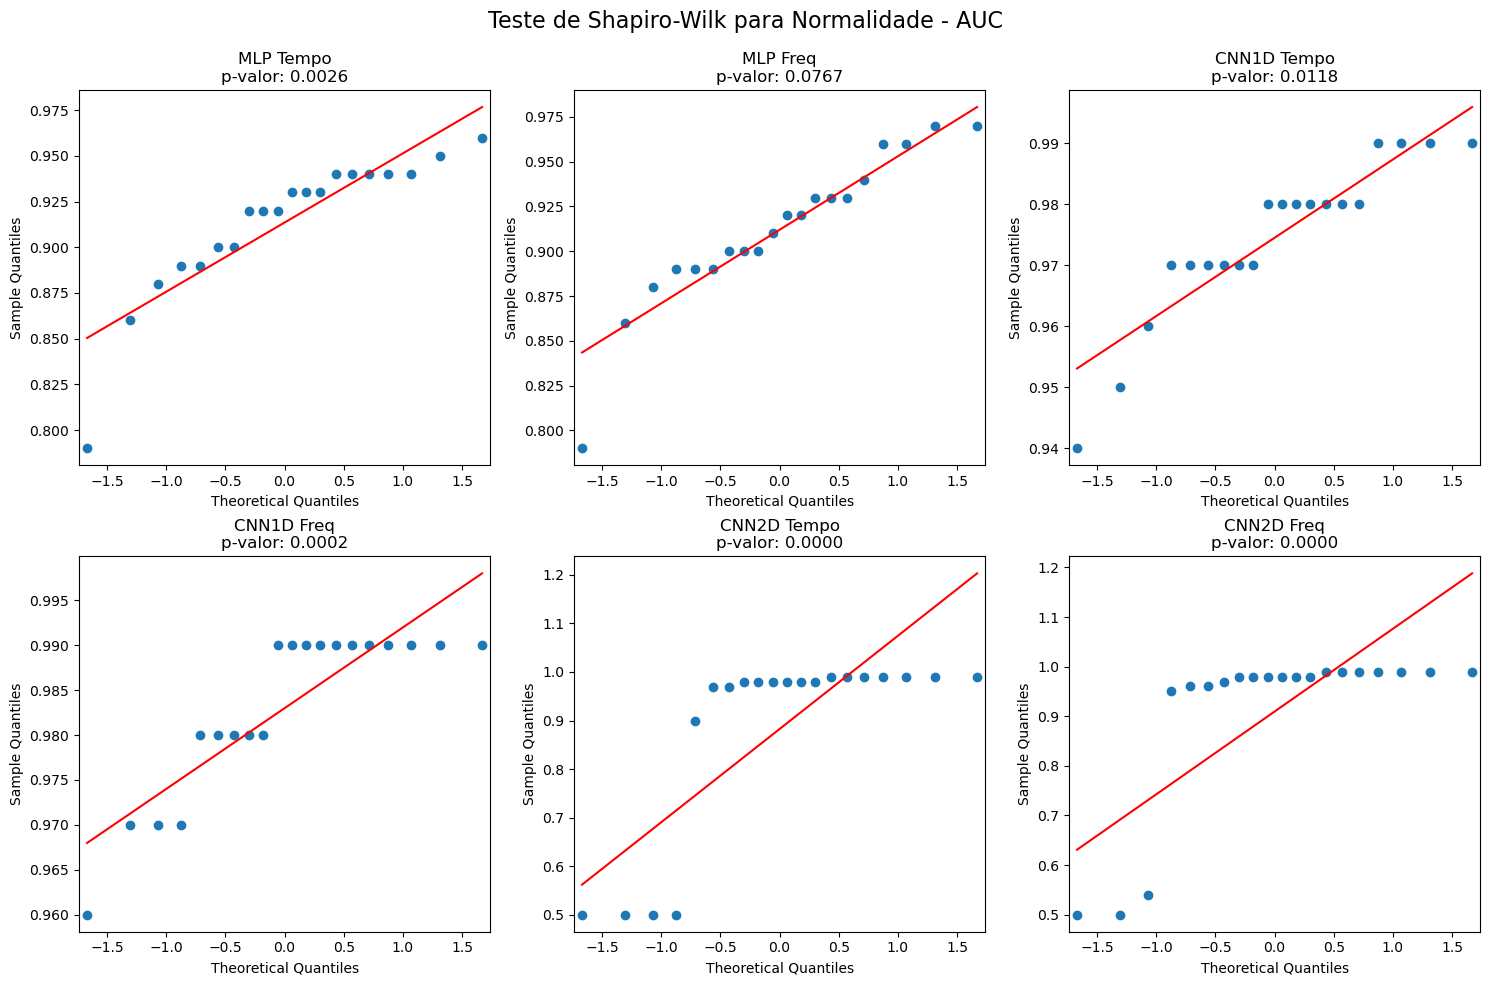

In [22]:
#TESTE DE NORMALIDADE AUC
teste_normalidade(auc_mlp_tempo,auc_mlp_freq,auc_cnn1d_tempo,auc_cnn1d_freq,auc_cnn2d_tempo,auc_cnn2d_freq, "AUC")

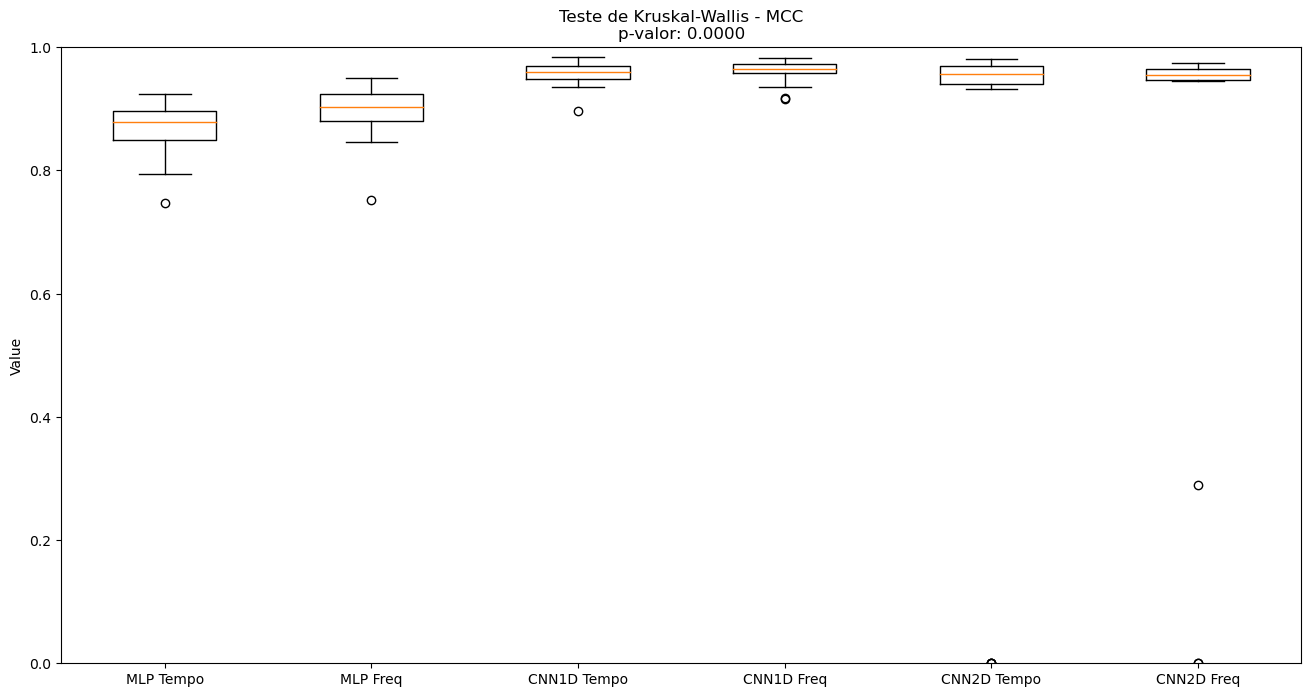

In [23]:
#TESTE DE KRUSKAL MCC
kruskal_wallis(mcc_mlp_tempo,mcc_mlp_freq,mcc_cnn1d_tempo,mcc_cnn1d_freq,mcc_cnn2d_tempo,mcc_cnn2d_freq,"MCC")

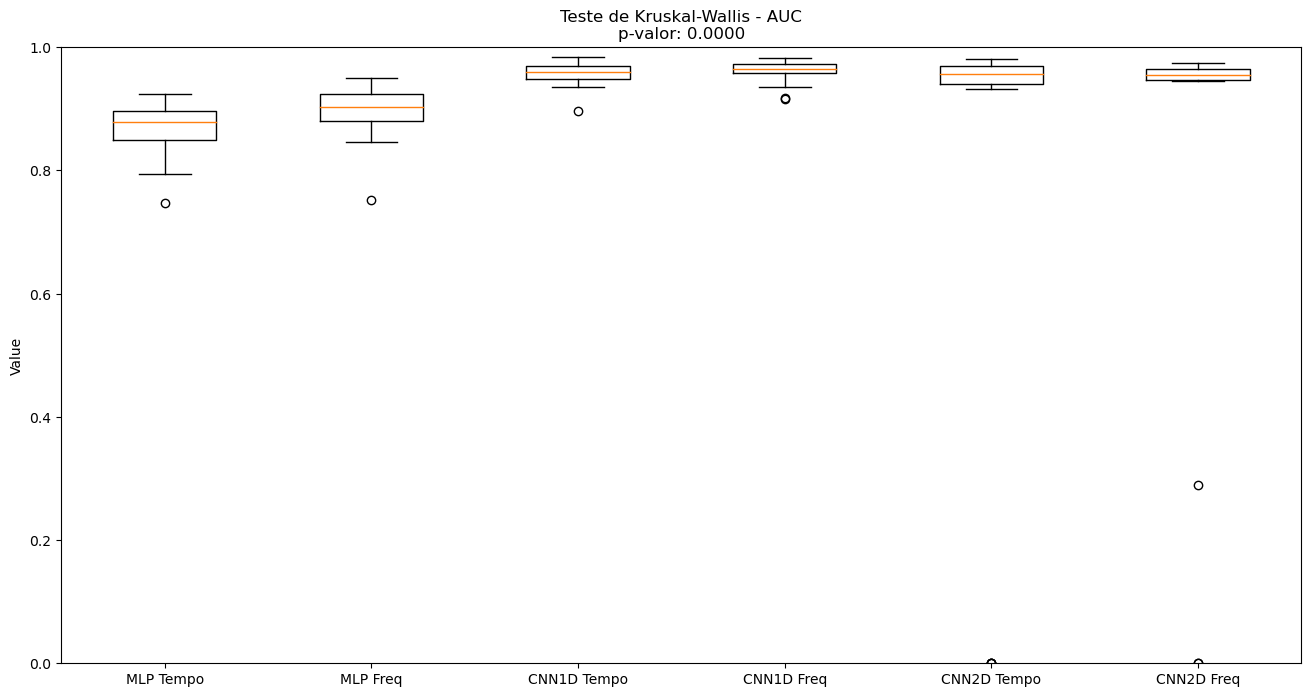

In [24]:
#TESTE DE KRUSKAL AUC
kruskal_wallis(auc_mlp_tempo,auc_mlp_freq,auc_cnn1d_tempo,auc_cnn1d_freq,auc_cnn2d_tempo,auc_cnn2d_freq,"AUC")

In [25]:
medias_mcc = [media_mlp_tempo_mcc, media_mlp_freq_mcc,media_cnn1d_tempo_mcc, media_cnn1d_freq_mcc,media_cnn2d_tempo_mcc, media_cnn2d_freq_mcc]
desvios_padrão_mcc = [desviop_mlp_tempo_mcc, desviop_mlp_freq_mcc,desviop_cnn1d_tempo_mcc, desviop_cnn1d_freq_mcc,desviop_cnn2d_tempo_mcc, desviop_cnn2d_freq_mcc]

medias_auc = [media_mlp_tempo_auc, media_mlp_freq_auc,media_cnn1d_tempo_auc, media_cnn1d_freq_auc,media_cnn2d_tempo_auc, media_cnn2d_freq_auc]
desvios_padrão_auc = [desviop_mlp_tempo_auc, desviop_mlp_freq_auc,desviop_cnn1d_tempo_auc, desviop_cnn1d_freq_auc,desviop_cnn2d_tempo_auc, desviop_cnn2d_freq_auc]

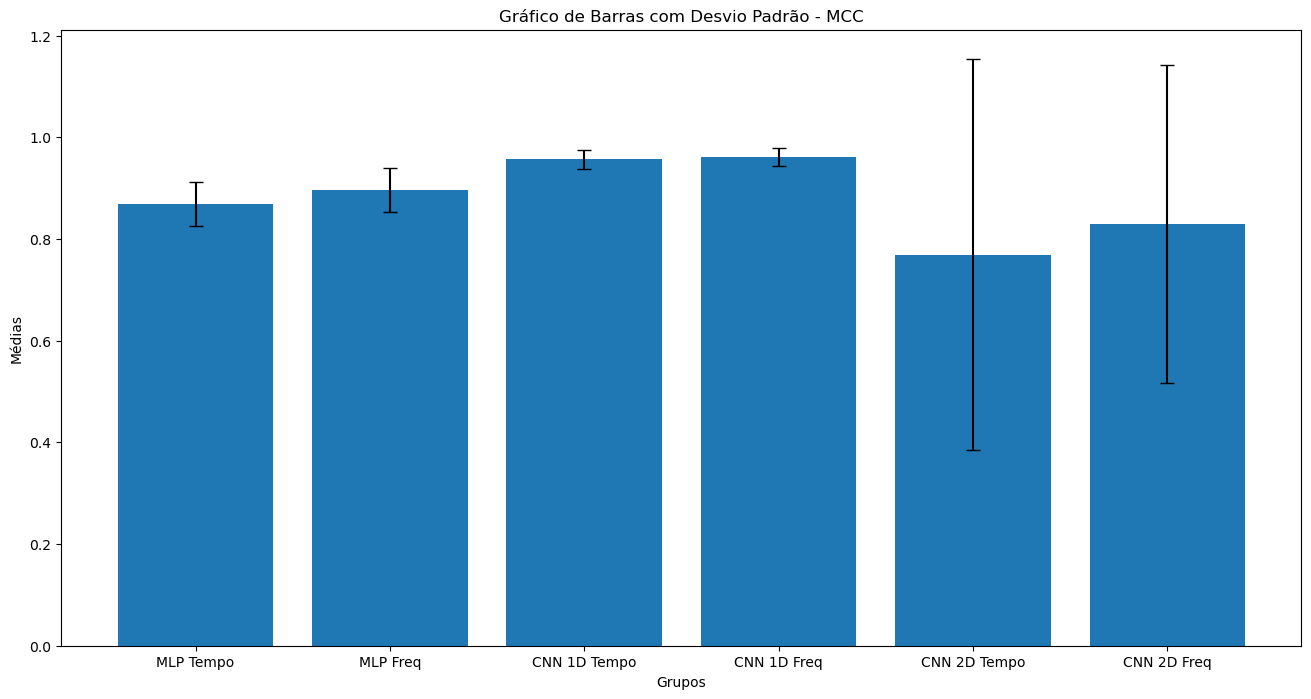

In [26]:
#Gráfico de Barras com Barras de Erro MCC
grafico_barras_com_erro(medias_mcc,desvios_padrão_mcc, "MCC")

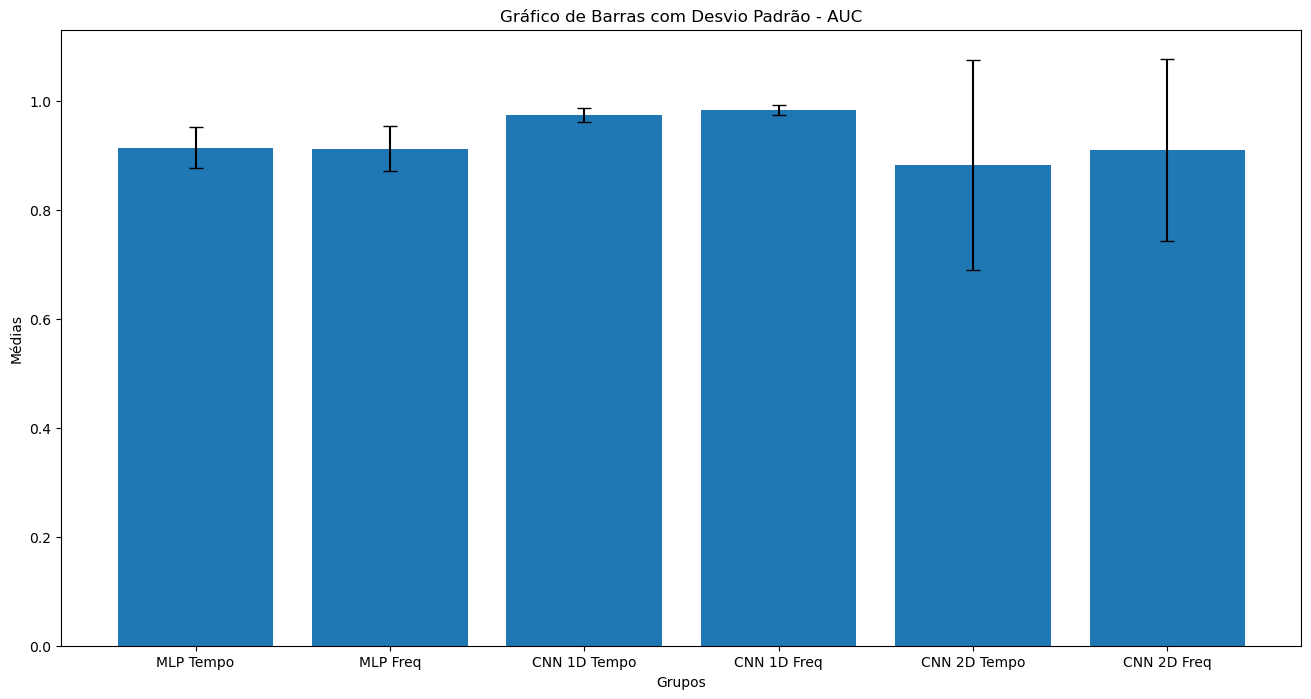

In [27]:
#Gráfico de Barras com Barras de Erro AUC

grafico_barras_com_erro(medias_auc,desvios_padrão_auc, "AUC")

# Dominio da Frequencia

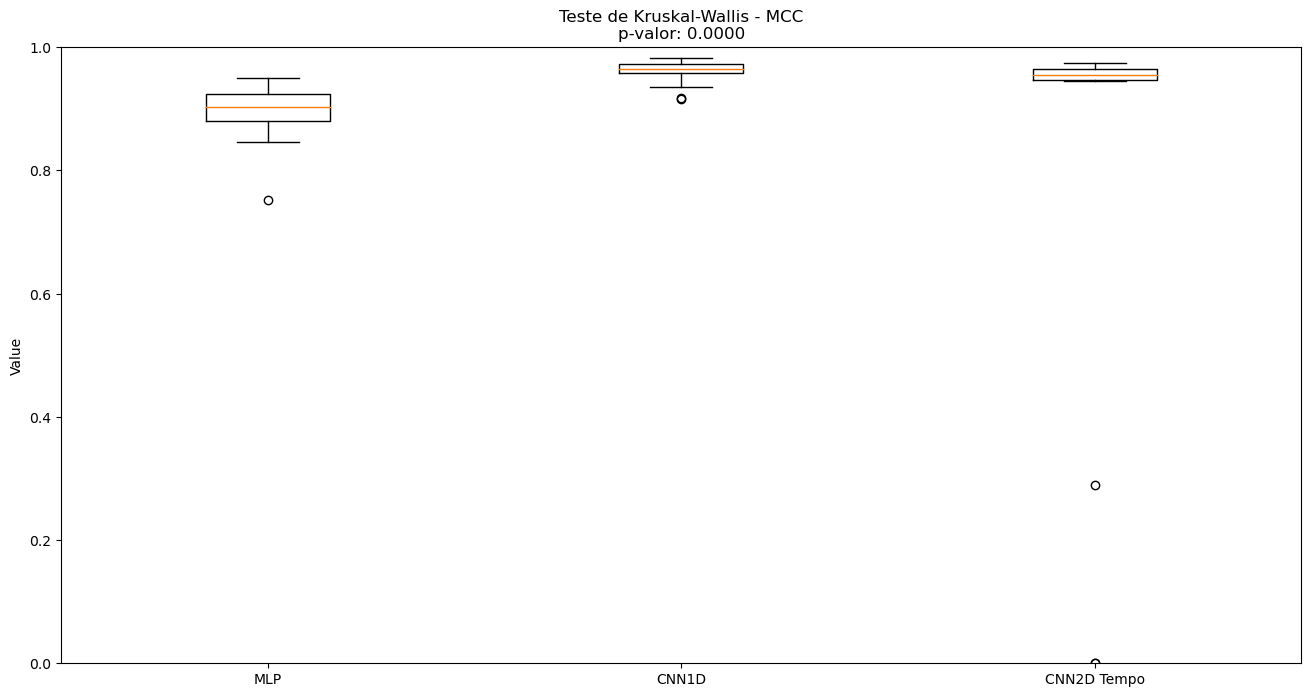

In [28]:
kruskal_wallis2(mcc_mlp_freq,mcc_cnn1d_freq,mcc_cnn2d_freq,"MCC")

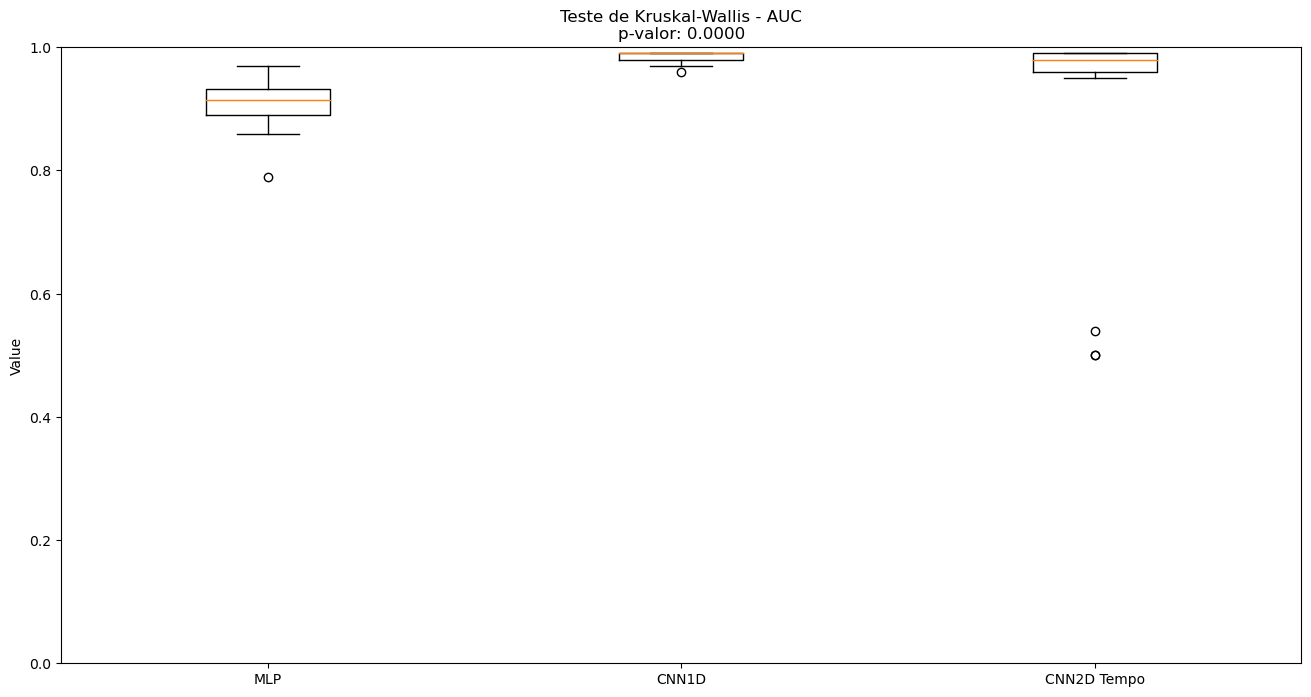

In [29]:
kruskal_wallis2(auc_mlp_freq,auc_cnn1d_freq,auc_cnn2d_freq,"AUC")

In [30]:
medias_mcc_freq = [media_mlp_freq_mcc, media_cnn1d_freq_mcc,media_cnn2d_freq_mcc]
desvios_padrão_mcc_freq = [desviop_mlp_freq_mcc, desviop_cnn1d_freq_mcc,desviop_cnn2d_freq_mcc]

medias_auc_freq = [media_mlp_freq_auc, media_cnn1d_freq_auc, media_cnn2d_freq_auc]
desvios_padrão_auc_freq = [desviop_mlp_freq_auc, desviop_cnn1d_freq_auc, desviop_cnn2d_freq_auc]

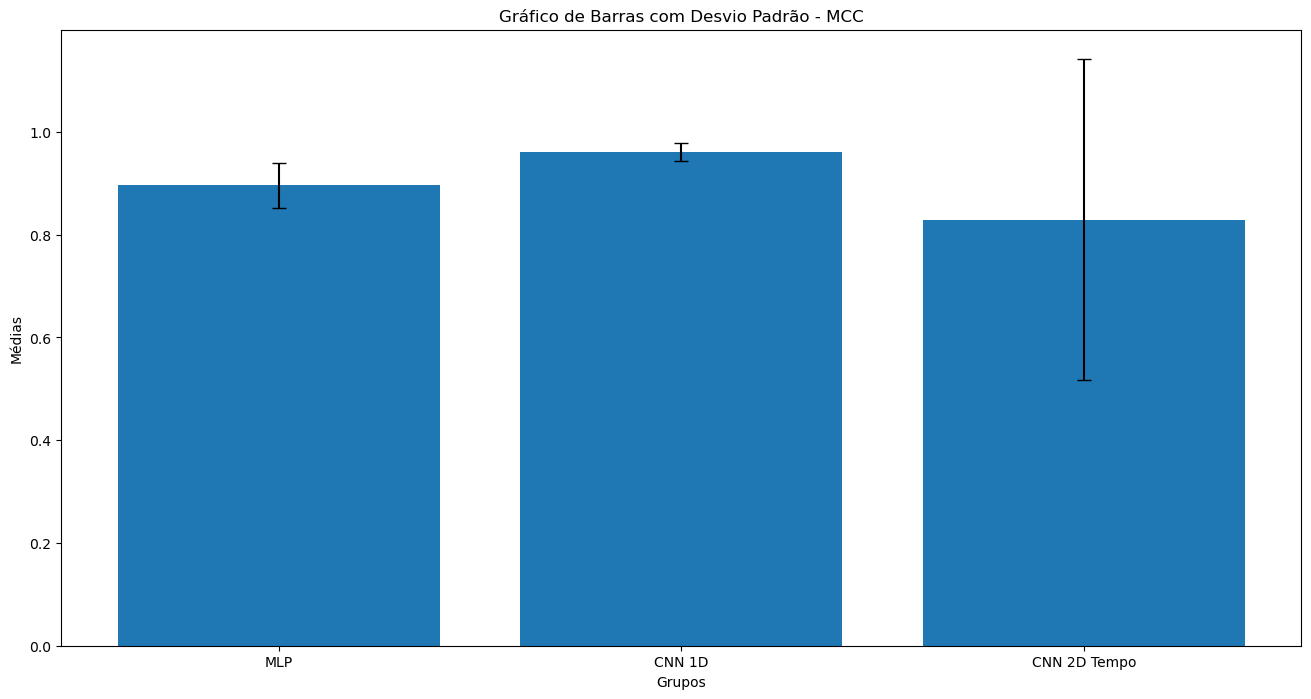

In [31]:
grafico_barras_com_erro2(medias_mcc_freq ,desvios_padrão_mcc_freq,metrica = 'MCC')

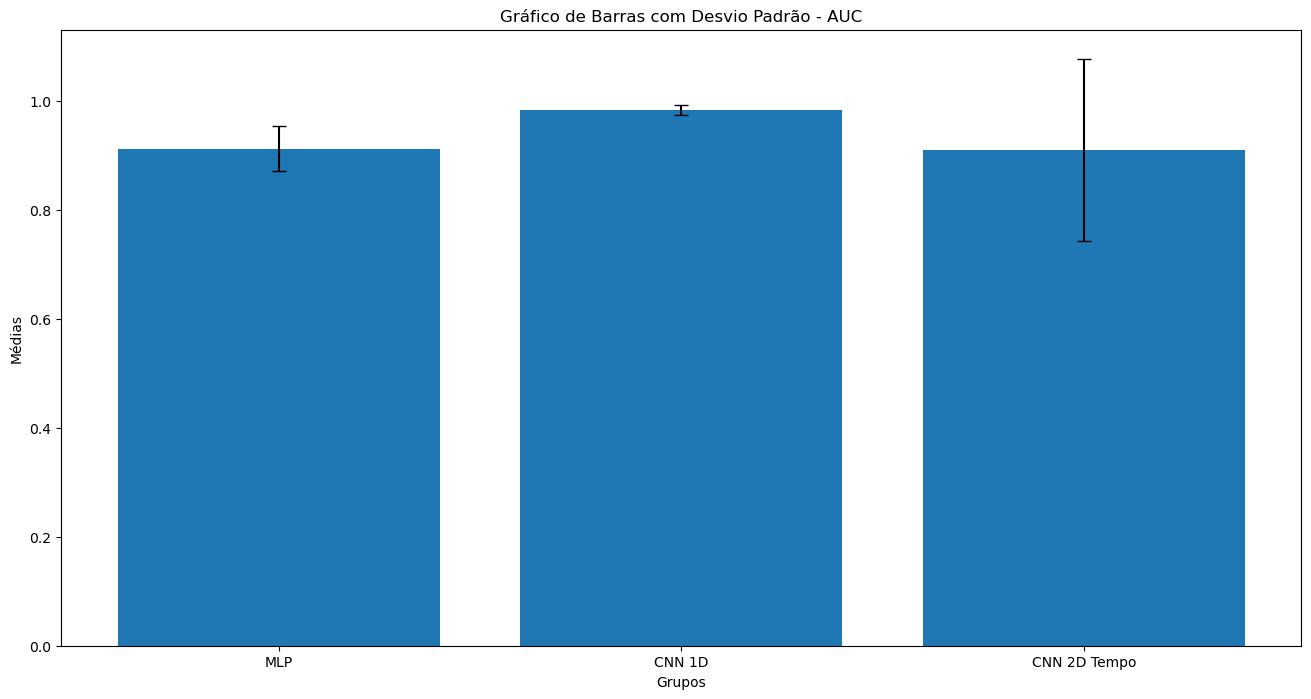

In [32]:
grafico_barras_com_erro2(medias_auc_freq ,desvios_padrão_auc_freq,metrica = 'AUC')

# Dominio do Tempo

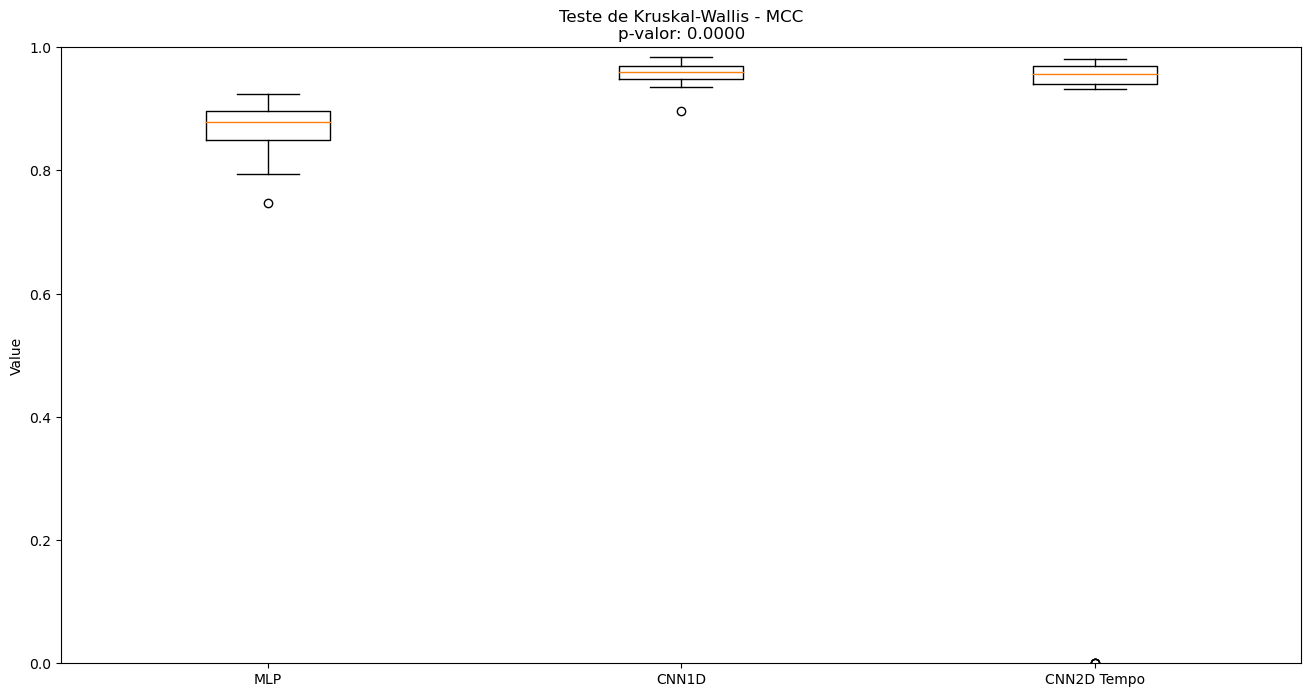

In [33]:
kruskal_wallis2(mcc_mlp_tempo,mcc_cnn1d_tempo,mcc_cnn2d_tempo,"MCC")

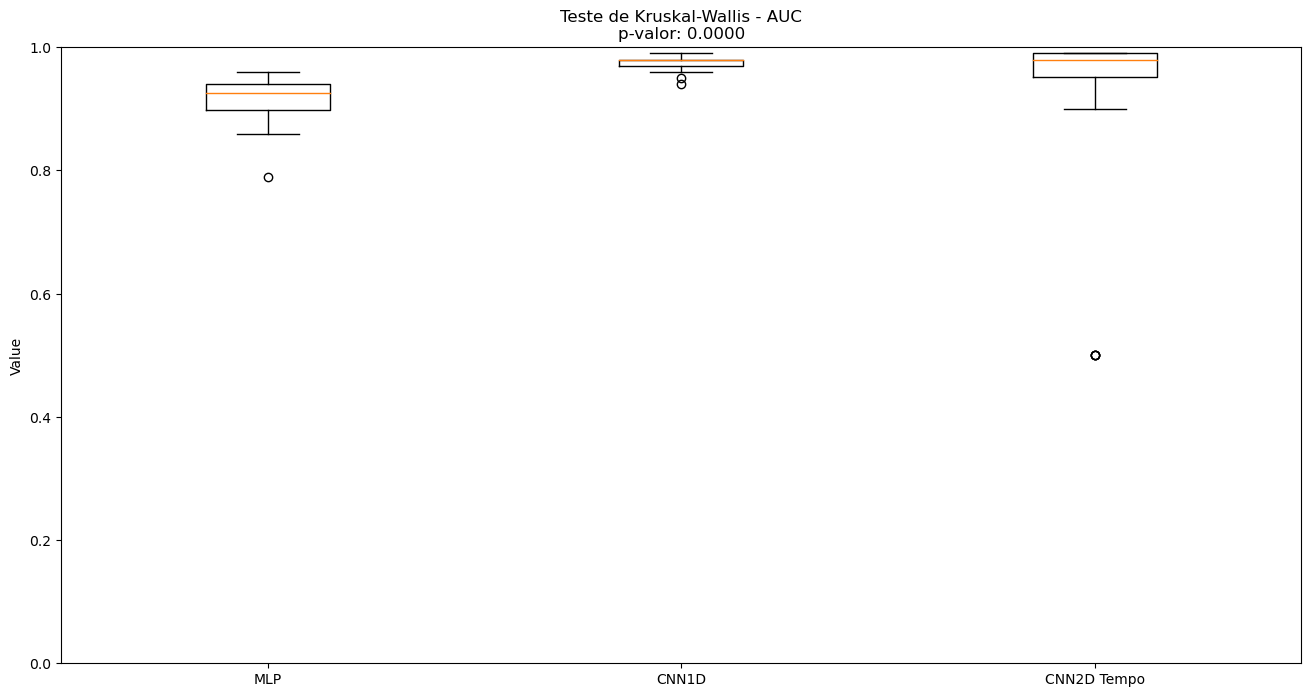

In [34]:
kruskal_wallis2(auc_mlp_tempo,auc_cnn1d_tempo,auc_cnn2d_tempo,"AUC")

In [35]:
medias_mcc_tempo = [media_mlp_tempo_mcc, media_cnn1d_tempo_mcc,media_cnn2d_tempo_mcc]
desvios_padrão_mcc_tempo = [desviop_mlp_tempo_mcc, desviop_cnn1d_tempo_mcc,desviop_cnn2d_tempo_mcc]

medias_auc_tempo = [media_mlp_tempo_auc, media_cnn1d_tempo_auc, media_cnn2d_tempo_auc]
desvios_padrão_auc_tempo = [desviop_mlp_tempo_auc, desviop_cnn1d_tempo_auc, desviop_cnn2d_tempo_auc]

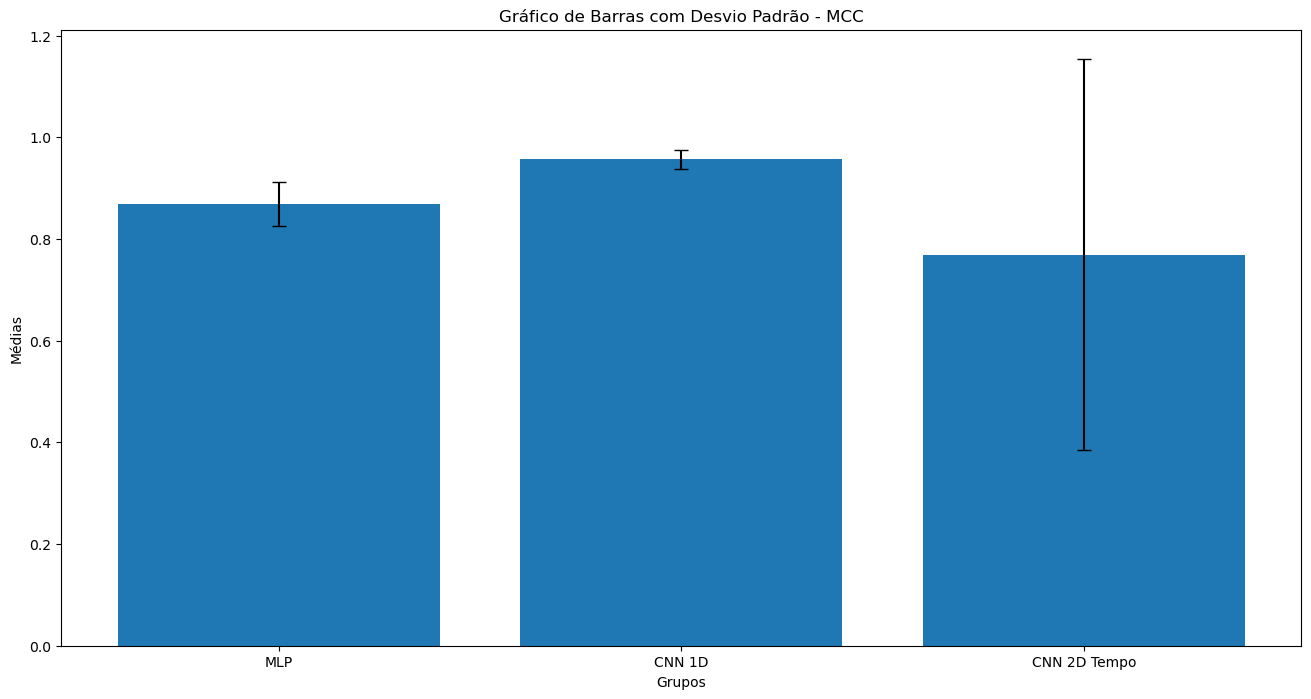

In [36]:
grafico_barras_com_erro2(medias_mcc_tempo ,desvios_padrão_mcc_tempo,metrica = 'MCC')

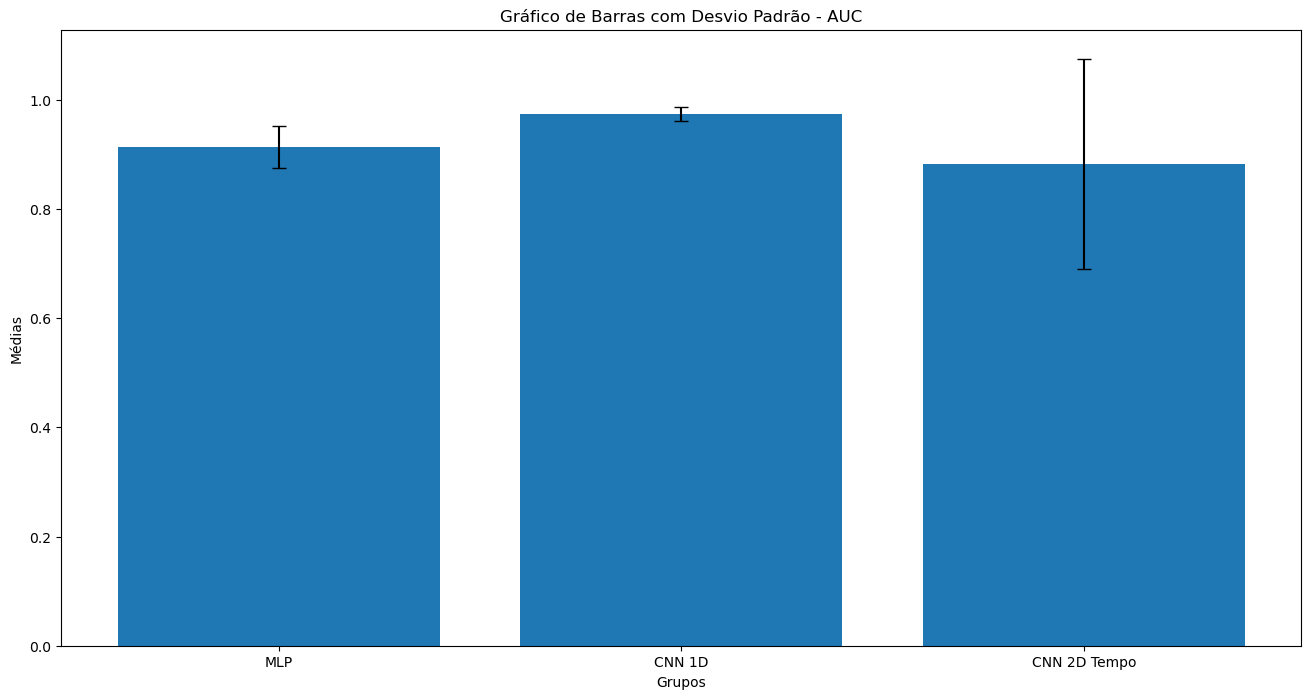

In [37]:
grafico_barras_com_erro2(medias_auc_tempo ,desvios_padrão_auc_tempo,metrica = 'AUC')

# MLP

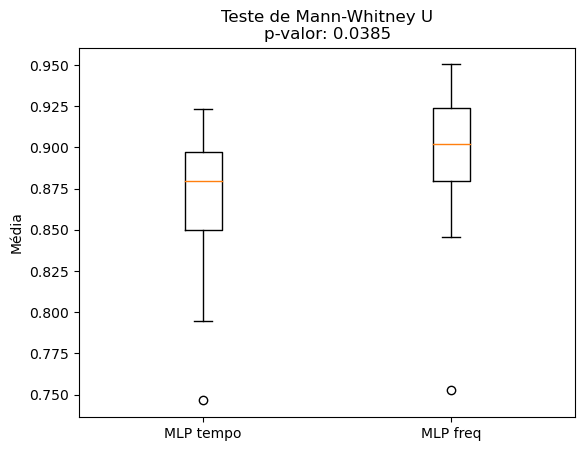

In [38]:
mann_whitney_u(mcc_mlp_tempo,mcc_mlp_freq,tipo='MLP')

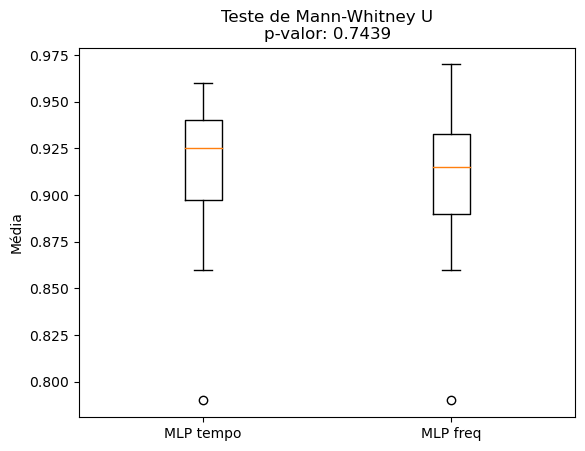

In [39]:
mann_whitney_u(auc_mlp_tempo,auc_mlp_freq,tipo='MLP')

# CNN1D

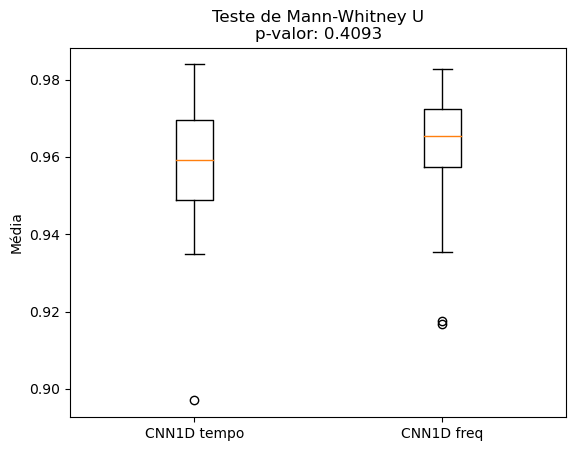

In [40]:
mann_whitney_u(mcc_cnn1d_tempo,mcc_cnn1d_freq,tipo='CNN1D')

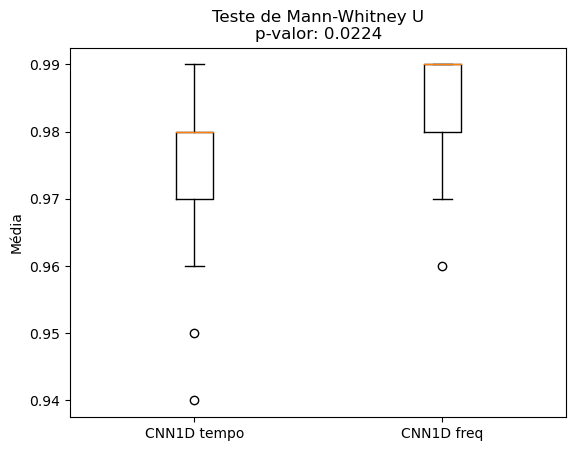

In [41]:
mann_whitney_u(auc_cnn1d_tempo,auc_cnn1d_freq,tipo='CNN1D')

# CNN2D

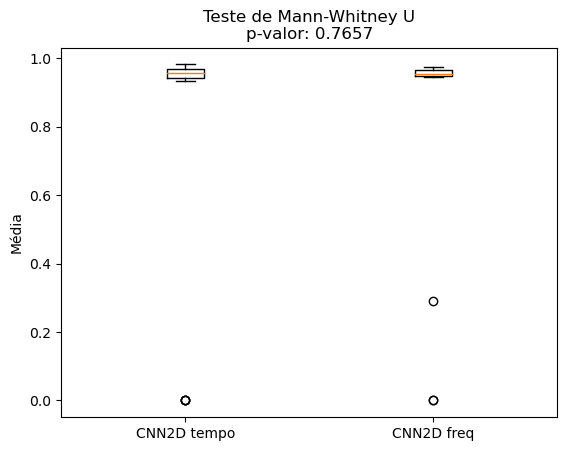

In [42]:
mann_whitney_u(mcc_cnn2d_tempo,mcc_cnn2d_freq,tipo='CNN2D')

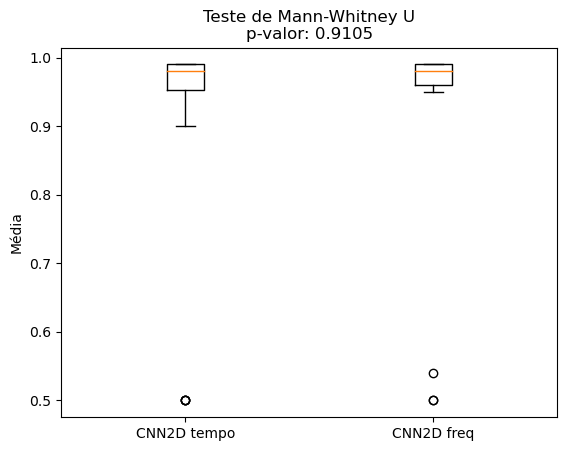

In [43]:
mann_whitney_u(auc_cnn2d_tempo,auc_cnn2d_freq,tipo='CNN2D')

# MLP X CNN1D

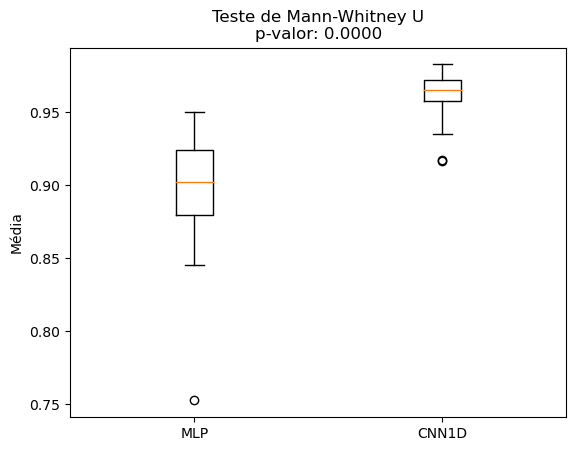

In [44]:
#mlpfreq e cnn1dfreq
mann_whitney_u2(mcc_mlp_freq,mcc_cnn1d_freq,'MLP','CNN1D')

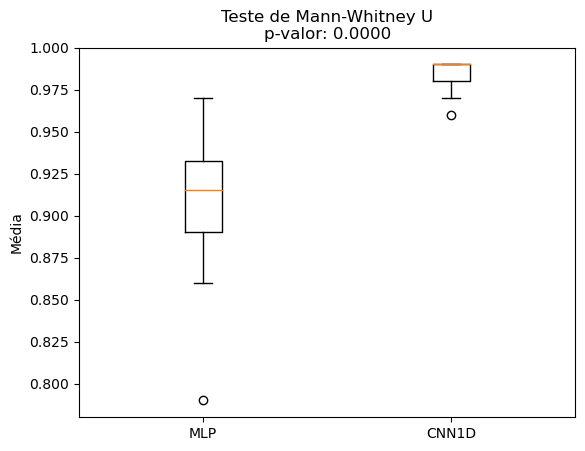

In [45]:
mann_whitney_u2(auc_mlp_freq,auc_cnn1d_freq,'MLP','CNN1D')

# MLP X CNN2D

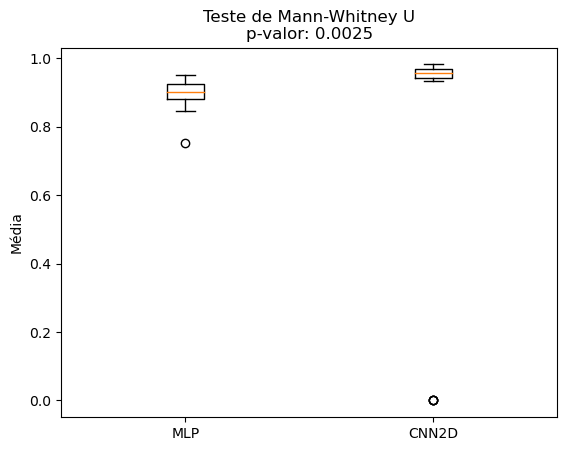

In [46]:
#mlpfreq e cnn2dtempo
mann_whitney_u2(mcc_mlp_freq,mcc_cnn2d_tempo,'MLP','CNN2D')

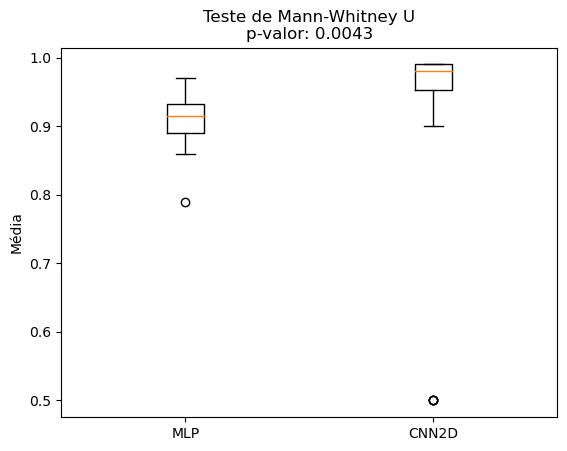

In [47]:
mann_whitney_u2(auc_mlp_freq,auc_cnn2d_tempo,'MLP','CNN2D')

# CNN1D X CNN2D

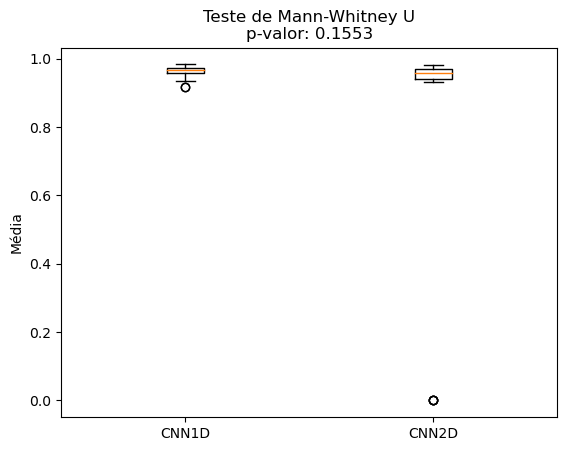

In [48]:
#cnn1dfreq e cnn2dtempo

mann_whitney_u2(mcc_cnn1d_freq,mcc_cnn2d_tempo,'CNN1D','CNN2D')

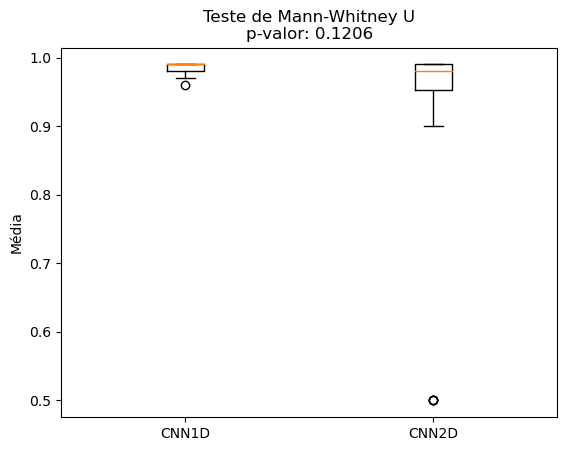

In [49]:
mann_whitney_u2(auc_cnn1d_freq,auc_cnn2d_tempo,'CNN1D','CNN2D')